In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
file = '../publication_database.csv'
images = '../publication_images'
import matplotlib.pyplot as plt
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
import matplotlib.cm as cm

ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('orthopyroxene')
model_names

['xu_1999_opx',
 'zhang_2016_opx',
 'd_2005_opx',
 'dk_2009_opx',
 'yang_11a_opx',
 'zh_2012_ortho']

# Exploring Pyrrhenious's Plagioclaise Models Database Correspondence

Here we look at Plagioclaise models parameterization correspondence of:

 * Yousheng Xu and Thomas J. Shankland 1999. Electrical conductivity of orthopyroxene and its high pressure phases
 
 * Dai et al., 2005. Experimental Study on the Electrical Conductivity of Orthopyroxene at High Temperature and High Pressure under Different Oxygen Fugacities
 
 * Dai and Karato 2009. Electrical conductivity of orthopyroxene: Implications for the water content of the asthenosphere
 
 * Yang et al., 2011 and Catherine McCammon 2012. Electrical conductivity of orthopyroxene and plagioclase in the lower crust
  
 * Zhang et al., 2012. Electrical conductivity of enstatite as a function of water content: Implications for the electrical structure in the upper mantle
 
* Baohua Zhang and Takashi Yoshino 2016. Effect of temperature, pressure and iron content on the electrical conductivity of orthopyroxene

Dai et al., 2005: Used an activation volume of 3.9 instead of 0.03 to fit figure. Reduced activation energy to 1.68 as well. 

Dai and Karato 2009: had to adjust preexp log upwards by 0.2 for first mechanism. Second mechanism had to be adjusted downward 0.4 log units in the preexp. The second enthalpy also needed adjustment.



## Yousheng Xu and Thomas J. Shankland 1999

(-5.0, 1.0)

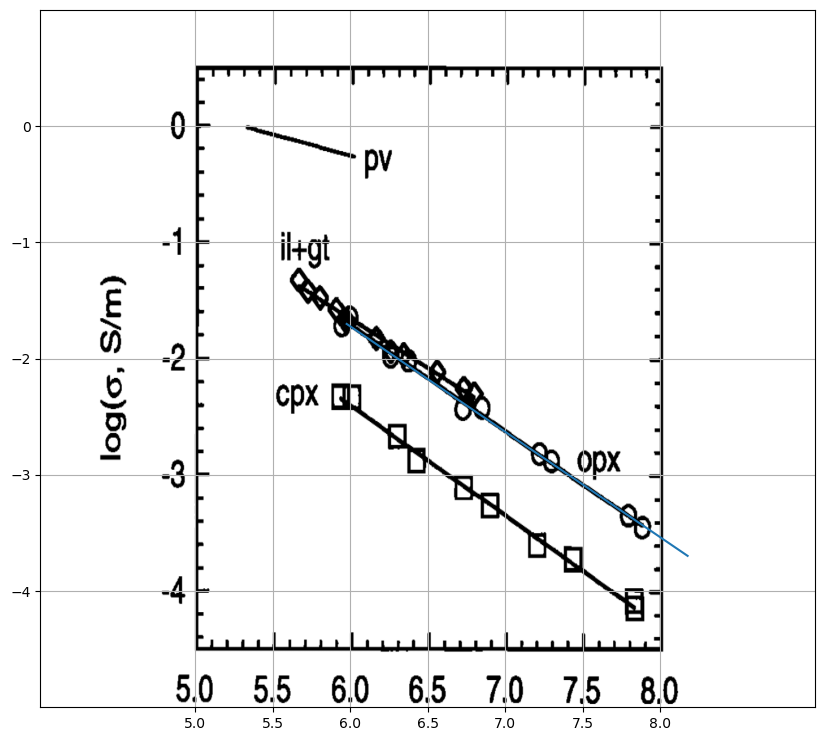

In [2]:
ec_model_row = ecdatabase.get_model_properties('xu_1999_opx')
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range =np.linspace(ec_model_row['temp_min']-50,ec_model_row['temp_max'],num=100,dtype=float).ravel()

for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    ecmodel = ecdatabase.get_model('xu_1999_opx')
     
    c = ecmodel.get_conductivity(T=temperature_range,)
    ax.plot(1e4/temperature_range,
    np.log10(c))

        
plt.xlim([4,9])
plt.ylim([-5,1])


## Dai et al., 2005

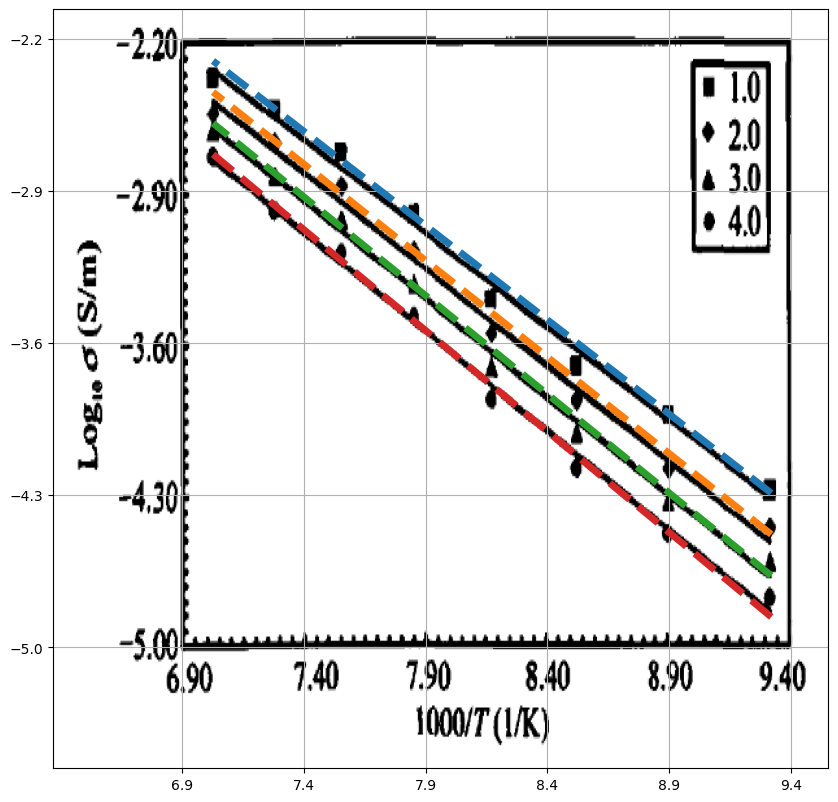

In [3]:
model = 'd_2005_opx'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=10,dtype=float).ravel()
model = ecdatabase.get_model(model)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i==1:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for P in [1,2,3,4]:
        conductivity = model.get_conductivity(T=temperature_range,P=P)

        ax.plot(1e4/temperature_range,np.log10(conductivity),linestyle='--',linewidth=5)
    

## Dai and Karato 2009

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


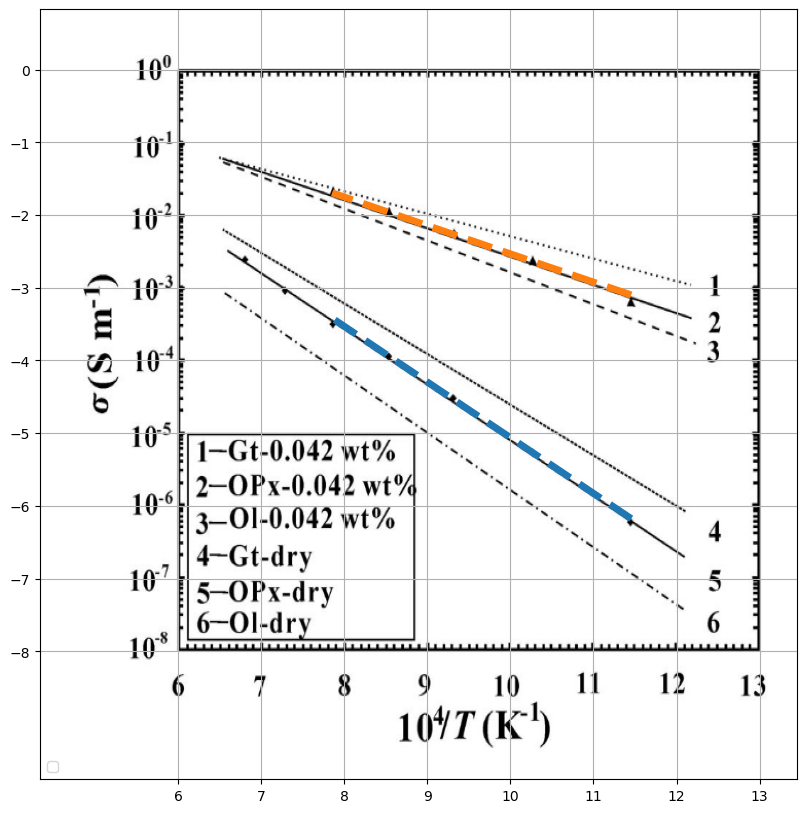

In [4]:
ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('orthopyroxene')
model = 'dk_2009_opx'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=10,dtype=float).ravel()
model = ecdatabase.get_model(model)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i==1:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for w in [0,0.042*1e4]:
        conductivity = model.get_conductivity(T=temperature_range,P=P,Cw=w)

        ax.plot(1e4/temperature_range,np.log10(conductivity),linestyle='--',linewidth=5)
plt.legend(loc='lower left')

## Yang et al., 2011

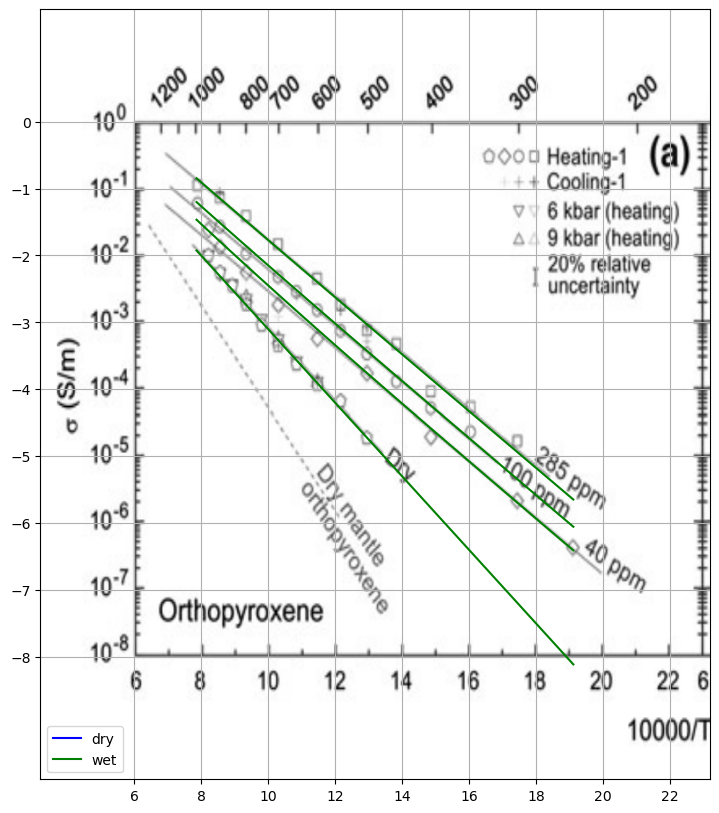

In [5]:
yc_models = ['yang_11a_opx']
ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('orthopyroxene')
water =[0,135,890]
ec_model_row = ecdatabase.get_model_properties(yc_models[0])
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range =np.linspace(ec_model_row['temp_min']-50,ec_model_row['temp_max'],num=100,dtype=float).ravel()

for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i!=1:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model_name in yc_models:
        ecmodel = ecdatabase.get_model(model_name)
        if 'dry' in model_name:
            c = ecmodel.get_conductivity(T=temperature_range)
            ax.plot(1e4/temperature_range,
            np.log10(c),color='blue')
        else:
            if 'nat' in model_name:
                color='blue'
            else:
                color='green'
            for w in [0, 40,100,285]: 
                c = ecmodel.get_conductivity(T=temperature_range,Cw=w)
                ax.plot(1e4/temperature_range,
                np.log10(c),color=color)
plt.plot([],[],color='blue',label='dry')
plt.plot([],[],color='green',label='wet')
#plt.xlim([5,11])
#plt.ylim([-8,0])
plt.legend(loc='lower left')

## Zhang et al., 2012

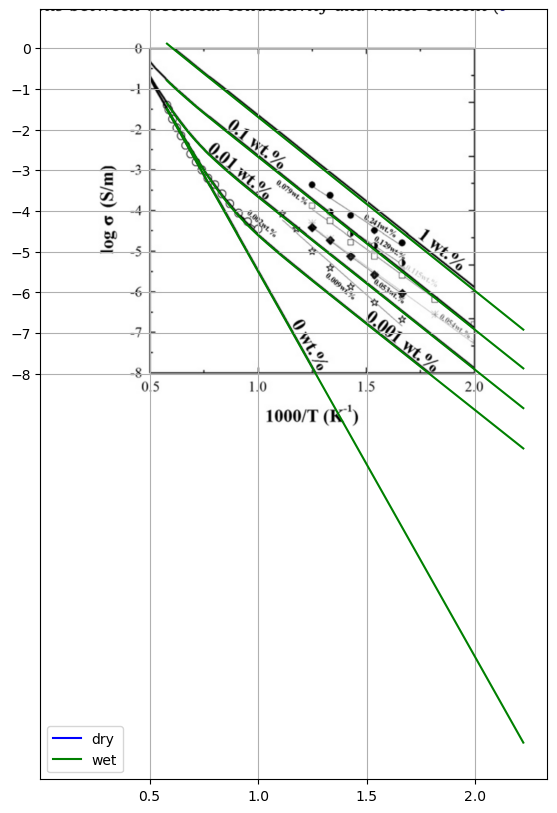

In [6]:
yc_models = ['zh_2012_ortho']

ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('orthopyroxene')
water =[0,135,890]
ec_model_row = ecdatabase.get_model_properties(yc_models[0])
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range =np.linspace(ec_model_row['temp_min']-50,ec_model_row['temp_max'],num=100,dtype=float).ravel()

for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model_name in yc_models:
        ecmodel = ecdatabase.get_model(model_name)
        if 'dry' in model_name:
            c = ecmodel.get_conductivity(T=temperature_range)
            ax.plot(1e4/temperature_range,
            np.log10(c),color='blue')
        else:
            if 'nat' in model_name:
                color='blue'
            else:
                color='green'
            for w in [0, 0.001,0.01,0.1,1]: 
                c = ecmodel.get_conductivity(T=temperature_range,Cw=w*1e4)
                ax.plot(1e3/temperature_range,
                np.log10(c),color=color)
plt.plot([],[],color='blue',label='dry')
plt.plot([],[],color='green',label='wet')
#plt.xlim([5,11])
#plt.ylim([-8,0])
plt.legend(loc='lower left')

## Zhang and Yoshino 2016

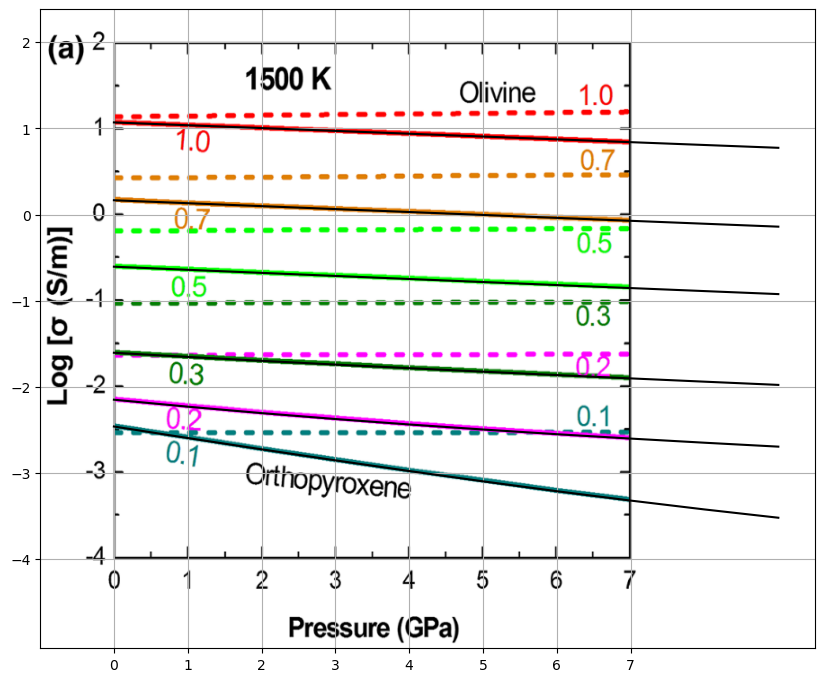

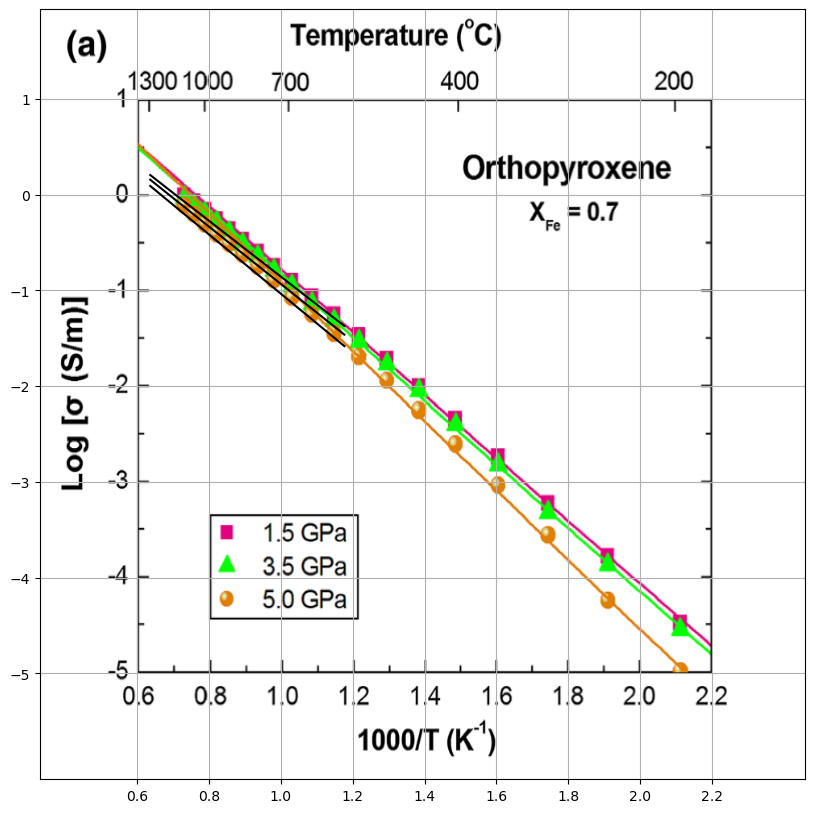

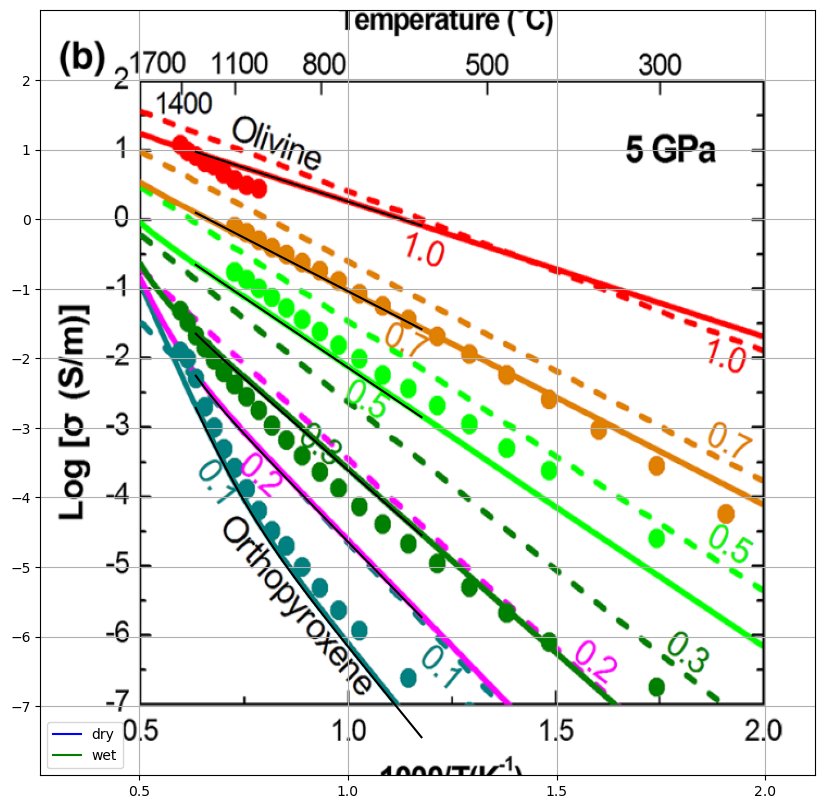

In [7]:
model_name = 'zhang_2016_opx'

ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('orthopyroxene')
water =[0,135,890]
ec_model_row = ecdatabase.get_model_properties(model_name)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range =np.linspace(ec_model_row['temp_min']-50,ec_model_row['temp_max'],num=100,dtype=float).ravel()

for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    if i==0:
        P = np.arange(0,10)
        for xfe in [0.1,0.2,0.3,0.5,0.7,1]:
            ecmodel = ecdatabase.get_model(model_name)
            c = ecmodel.get_conductivity(T=1500,P=P,X_fe=xfe)
            ax.plot(P,np.log10(c),color='black')
    elif i==1:
        for P in [1.5,3,5]:
            ecmodel = ecdatabase.get_model(model_name)
            c = ecmodel.get_conductivity(T=temperature_range,P=P,X_fe=0.7)
            ax.plot(1e3/temperature_range,np.log10(c),color='black')
            
    else:
        for xfe in [0.1,0.2,0.3,0.5,0.7,1]:
            ecmodel = ecdatabase.get_model(model_name)
            c = ecmodel.get_conductivity(T=temperature_range,P=5,X_fe=xfe)
            ax.plot(1e3/temperature_range,np.log10(c),color='black')
        
plt.plot([],[],color='blue',label='dry')
plt.plot([],[],color='green',label='wet')
#plt.xlim([5,11])
#plt.ylim([-8,0])
plt.legend(loc='lower left')